In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Load dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv"
netflix_df = pd.read_csv(url)

# Clean 'date_added'
netflix_df['date_added'] = netflix_df['date_added'].astype(str).str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract useful columns
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')

# Drop rows without important values
netflix_df = netflix_df.dropna(subset=['year_added', 'release_year'])


### Q1. How has the distribution of content ratings changed over time?

We want to analyze whether Netflix’s maturity ratings (like TV-MA, TV-14, PG, etc.) have shifted over the years. This helps us understand how the platform’s target audience focus has evolved.



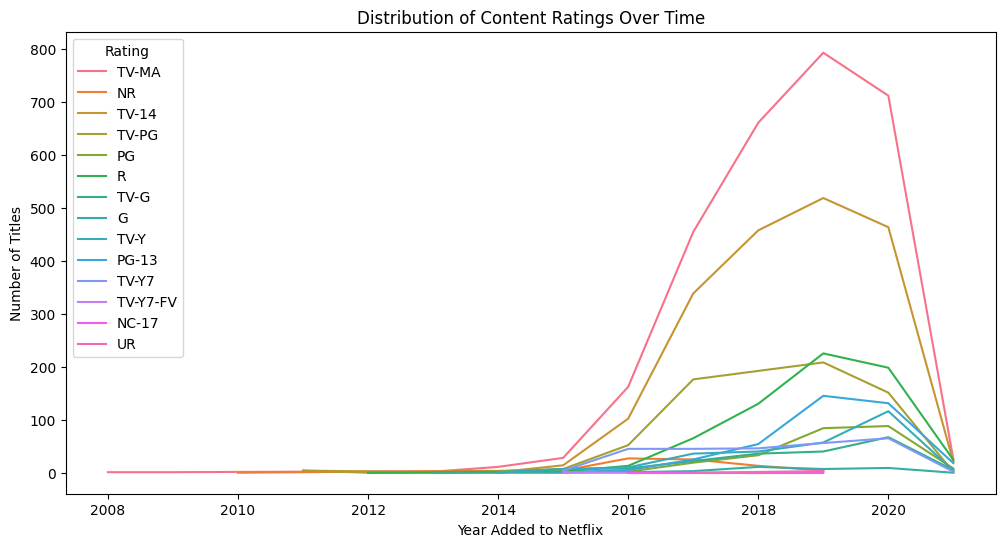

In [ ]:
ratings_over_time = netflix_df.groupby(['year_added', 'rating']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=ratings_over_time, x='year_added', y='count', hue='rating')
plt.title("Distribution of Content Ratings Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.show()


**Insight:**  
The plot shows that ratings like **TV-MA** and **TV-14** have grown sharply, indicating a stronger focus on mature content. In contrast, ratings like **G** or **TV-Y** (children’s content) remain relatively low and flat.

### Q2. Is there a relationship between content age and its type (Movie vs. TV Show)?

We calculate the "age" of a title as the difference between the year it was added to Netflix and its release year. Then, we compare this for Movies and TV Shows.


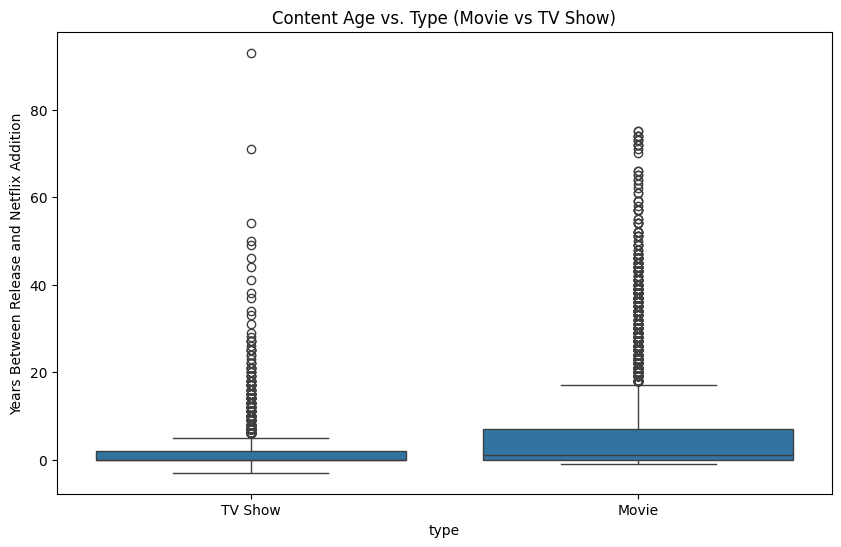

In [ ]:
 netflix_df['content_age'] = netflix_df['year_added'] - netflix_df['release_year']

plt.figure(figsize=(10,6))
sns.boxplot(data=netflix_df, x='type', y='content_age')
plt.title("Content Age vs. Type (Movie vs TV Show)")
plt.ylabel("Years Between Release and Netflix Addition")
plt.show()


**Insight:**  
- Many **TV Shows** are added the same year they are released (age ≈ 0), which fits Netflix Originals.  
- **Movies** show a much wider age range, meaning Netflix acquires both new and older films.  


### Q3. Trends in release year vs. year added to Netflix

We compare when content was originally released versus when it was added to Netflix. This shows whether Netflix is focusing more on originals or on older licensed content.


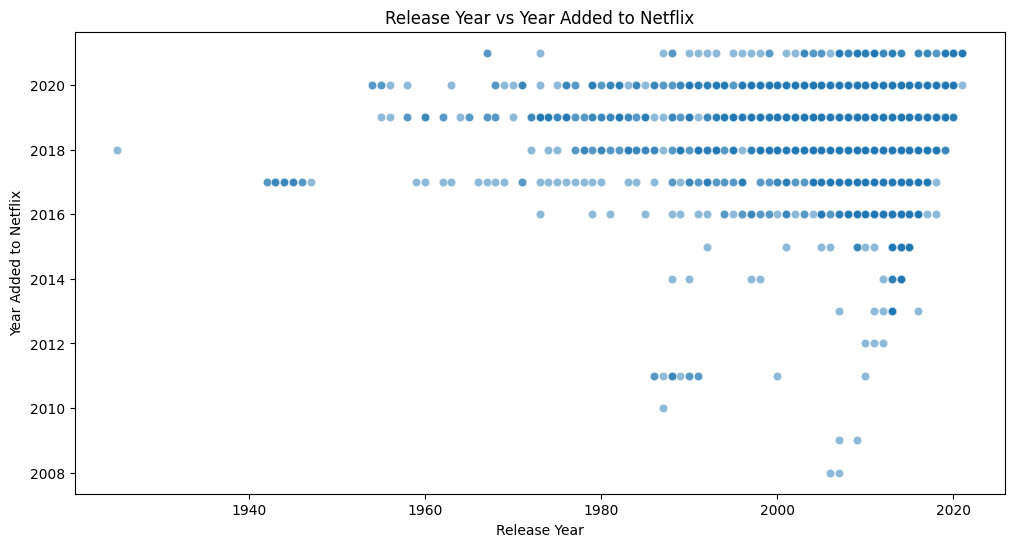

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=netflix_df, x='release_year', y='year_added', alpha=0.5)
plt.title("Release Year vs Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()


**Insight:**  
Most titles fall close to the diagonal line (`release_year ≈ year_added`), showing Netflix’s focus on **new releases and originals**. However, there are also many titles with a big gap, showing Netflix acquires **older classics** too.


### Q4. Most common word pairs or phrases in descriptions

We use NLP to extract the most frequent **bigrams** (two-word phrases) from the description column. This highlights recurring themes and storytelling patterns.


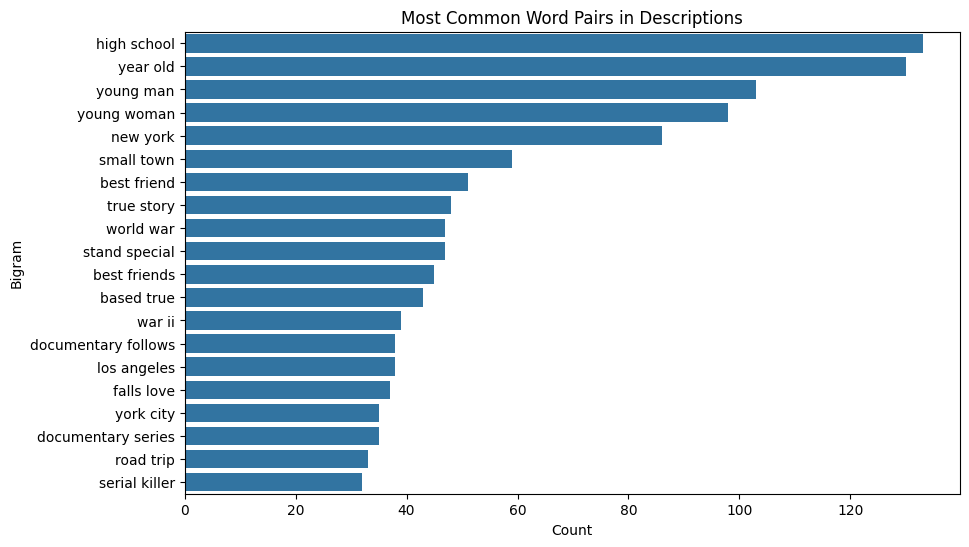

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

descriptions = netflix_df['description'].dropna()

# Use bigrams (two-word phrases)
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(descriptions)
bigrams = vectorizer.transform(descriptions)

sum_words = bigrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

# Convert to DataFrame
bigram_df = pd.DataFrame(words_freq, columns=['Bigram','Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=bigram_df, x='Count', y='Bigram')
plt.title("Most Common Word Pairs in Descriptions")
plt.show()


**Insight:**  
Common phrases like **“young woman”**, **“high school”**, and **“best friends”** dominate, showing Netflix’s strong emphasis on youth, relationships, and personal journeys in its storytelling.


### Q5. Top Directors on Netflix

We split the director column (some titles have multiple directors) and count the frequency of each.


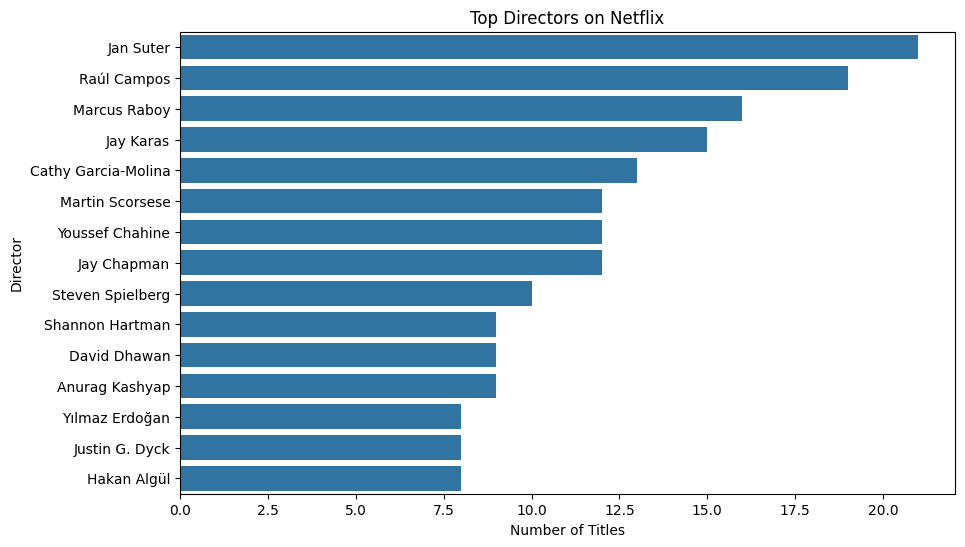

In [ ]:
# Split director column (some rows have multiple directors separated by commas)
directors = netflix_df['director'].dropna().str.split(',').explode().str.strip()

top_directors = directors.value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


**Insight:**  
The chart reveals directors with the highest number of titles. Many are **Indian and American filmmakers**, reflecting Netflix’s strong international focus alongside Hollywood.


## 📌 Summary of Findings

### Distribution of Ratings Over Time
- Netflix increasingly emphasizes **mature audiences**, with strong growth in `TV-MA` and `TV-14` content.  
- Content for children (`TV-Y`, `G`) remains relatively small and stable.  

### Content Age vs. Type
- **TV Shows** are often added the same year they’re released (age ≈ 0), reflecting Netflix Originals and simultaneous releases.  
- **Movies** have a much wider age range, showing Netflix acquires both brand-new releases and older classics.  

### Release Year vs. Year Added
- Most titles cluster along the diagonal (release year ≈ year added), meaning Netflix prioritizes **fresh releases**.  
- A significant portion of **older content** is also added, building a strong library of classics.  

### Common Word Pairs in Descriptions
- Popular themes include **“young woman,” “high school,” “best friends”**, highlighting Netflix’s strong focus on **youth, relationships, and personal journeys**.  
- **Action-oriented phrases** also appear, indicating genre diversity.  

### Top Directors on Netflix
- The most frequent directors come from both **Hollywood** and **international cinema (especially India)**.  
- This showcases Netflix’s **global expansion strategy**.  
